In [90]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [40]:
ads_df = pd.read_csv('Project2_Lee_Yueh_Friar/data/poltical_tv_ad_archive_entire_dataset.csv')

In [41]:
ads_metadata = pd.read_csv("Project2_Lee_Yueh_Friar/data/unique_ad_metadata.csv")

Variables of interest
* location
* program_type
* start_time
* end_time
* sponsors
* candidates
* message

In [99]:
len(ads_metadata[ads_metadata.reference_count > 0])

120

In [100]:
len(ads_metadata)

2842

In [42]:
# Looking at the data

pd.set_option('display.max_columns', None)
print(len(ads_df))
ads_df.head(10)

375350


,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
5,6,5643,WTVT,"Tampa-St. Petersburg, FL",TMZ Live,not news,2016-08-30 19:55:14 UTC,2016-08-30 19:55:44 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
6,7,5643,WTOG,"Tampa-St. Petersburg, FL",Justice for All With Cristina Perez,not news,2016-08-30 13:22:30 UTC,2016-08-30 13:23:00 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
7,8,5643,WLFL,"Raleigh-Durham-Fayetteville, NC",The Flash,not news,2016-09-07 00:45:00 UTC,2016-09-07 00:45:30 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
8,9,5643,WOIO,"Cleveland, Ohio",Cleveland 19 News at 6PM,news,2016-08-30 22:12:59 UTC,2016-08-30 22:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32
9,10,5643,WRAL,"Raleigh-Durham-Fayetteville, NC",Last Call With Carson Daly,not news,2016-08-30 05:53:01 UTC,2016-08-30 05:53:31 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32


In [96]:
# Presidential Race and 2016
# dates before the election race
# standardize message type (Mixed and Mix)
# 
ads_df.race.value_counts()

PRES    223722
PAS1     26088
NHS1     21680
NVS2     19451
WIS2     11061
OHS2      8048
NCS2      6668
FLS2      6404
MD08      5392
AZS1      4745
COS1      2521
MDS2      2202
IAS1      1628
MD04      1448
PA08      1198
OH08       830
AZ05       713
CAS1       437
OH14       336
NJ03       211
NC02       208
PA02       168
ILS2       149
WI01       127
KS01        17
NC11         8
KYS2         7
INS2         6
CO06         5
Name: race, dtype: int64

In [95]:
ads_df.start_time.apply(lambda x : str(datetime.datetime.date(x))[:7]).value_counts().sort_index()

2014-09       14
2014-10        4
2015-10       18
2015-11     1920
2015-12    19857
2016-01    55880
2016-02    46423
2016-03    26320
2016-04    15767
2016-05     2307
2016-06     2541
2016-07     2854
2016-08    31123
2016-09    55514
2016-10    78044
2016-11    36764
Name: start_time, dtype: int64

In [86]:
ads_df.isnull().sum()

id                   0
wp_identifier        0
network              0
location            25
program             15
program_type         0
start_time           0
end_time             0
archive_id           0
embed_url            0
sponsors          1162
sponsor_types     1162
race             29872
cycle            29101
subjects         22562
candidates       25127
type                 0
message              0
date_created         0
state                0
dtype: int64

In [43]:
#change start_time, end_time to 'date' types
ads_df['start_time'] = pd.to_datetime(ads_df['start_time'])
ads_df['end_time'] = pd.to_datetime(ads_df['end_time'])
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375350 entries, 0 to 375349
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   id             375350 non-null  int64              
 1   wp_identifier  375350 non-null  int64              
 2   network        375350 non-null  object             
 3   location       375325 non-null  object             
 4   program        375335 non-null  object             
 5   program_type   375350 non-null  object             
 6   start_time     375350 non-null  datetime64[ns, UTC]
 7   end_time       375350 non-null  datetime64[ns, UTC]
 8   archive_id     375350 non-null  object             
 9   embed_url      375350 non-null  object             
 10  sponsors       374188 non-null  object             
 11  sponsor_types  374188 non-null  object             
 12  race           345478 non-null  object             
 13  cycle          346249 non-nul

In [45]:
ads_df['candidates'].value_counts(dropna=False).head(10)

Donald Trump                     56297
Hillary Clinton                  49568
Bernie Sanders                   31886
NaN                              25127
Donald Trump, Hillary Clinton    22005
Marco Rubio                      21139
Kelly Ayotte                     10289
Catherine Cortez Masto            9735
Pat Toomey                        9179
Katie McGinty                     7811
Name: candidates, dtype: int64

In [46]:
ads_df['message'].value_counts(dropna=False)

con        128108
pro        115091
unknown     78724
mixed       53024
mix           403
Name: message, dtype: int64

In [47]:
ads_df['program'].value_counts(dropna=False).head(20)

Today                                     14782
CBS This Morning                           8344
Good Morning America                       7896
Judge Judy                                 5650
Jeopardy                                   4364
Wheel of Fortune                           4005
The Ellen De Generes Show                  4001
Family Feud                                3926
Dr. Phil                                   3712
The Late Show With Stephen Colbert         3479
Jimmy Kimmel Live                          3430
FOX 25 Morning News                        3375
FOX5 News This Morning                     3283
The Tonight Show Starring Jimmy Fallon     3268
Inside Edition                             3202
Steve Harvey                               2999
ET Entertainment Tonight                   2893
The Dr. Oz Show                            2515
Live With Kelly                            2479
Rachael Ray                                2462
Name: program, dtype: int64

In [48]:
ads_df['network'].value_counts(dropna=False).head(20)

WMUR    15940
WCAU    11955
KVVU    11360
WPVI    11213
KTNV    11067
KYW     11057
WHDH    10656
KSNV    10229
KLAS     9476
WTXF     8761
WBZ      8462
WFXT     8143
WCVB     7720
KCRG     7675
WFTS     7476
WTVT     7458
WJW      7165
KGAN     6858
WEWS     6374
KWWL     6068
Name: network, dtype: int64

In [49]:
ads_df['program_type'].value_counts(dropna=False)

news        241923
not news    133427
Name: program_type, dtype: int64

In [50]:
ads_df['type'].value_counts(dropna=False)

campaign    374977
issue          373
Name: type, dtype: int64

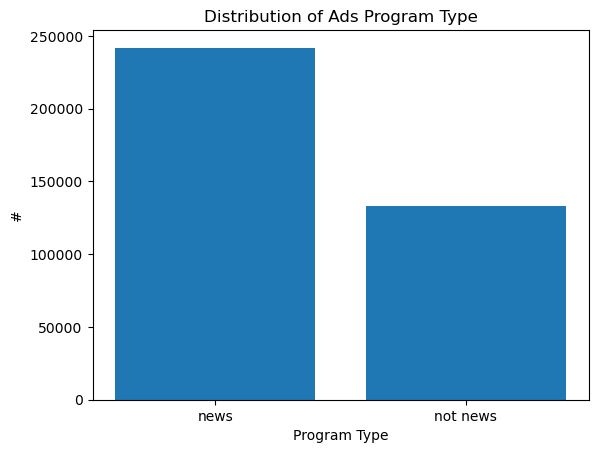

In [51]:
#bar chart for program type distribution 
program_type=ads_df["program_type"].value_counts(dropna=False)
df=pd.DataFrame({'Program_Type':program_type.index, 'Count':program_type.values})
plt.bar(df.Program_Type, df.Count)
plt.xlabel("Program Type")
plt.ylabel("#")
plt.title('Distribution of Ads Program Type')
plt.show()

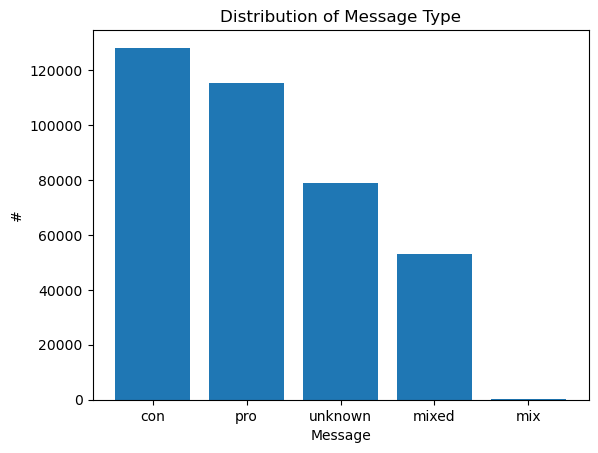

In [52]:
#bar chart for message distribution 
message=ads_df["message"].value_counts(dropna=False)
df=pd.DataFrame({'Message':message.index, 'Count':message.values})
plt.bar(df.Message, df.Count)
plt.xlabel("Message")
plt.ylabel("#")
plt.title('Distribution of Message Type')
plt.show()

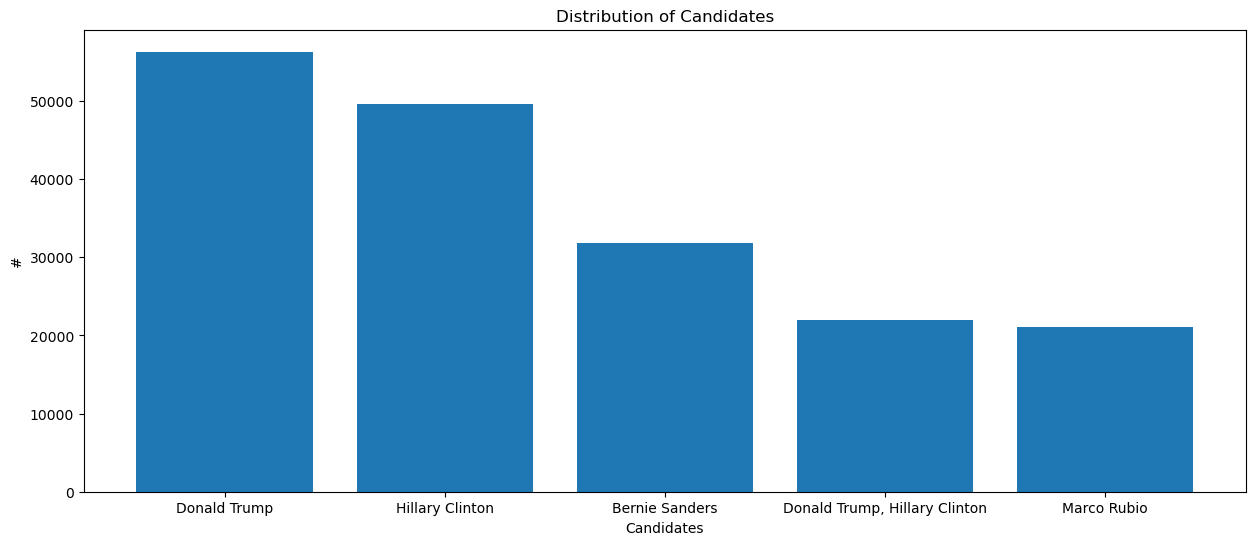

In [53]:
#bar chart for candidate distribution 
candidate=ads_df['candidates'].value_counts(dropna=True).head(5)
df=pd.DataFrame({'Candidates':candidate.index, 'Count':candidate.values})
plt.figure(figsize=(15,6))
plt.bar(df.Candidates, df.Count)
plt.xlabel("Candidates")
plt.ylabel("#")
plt.title('Distribution of Candidates')
plt.show()

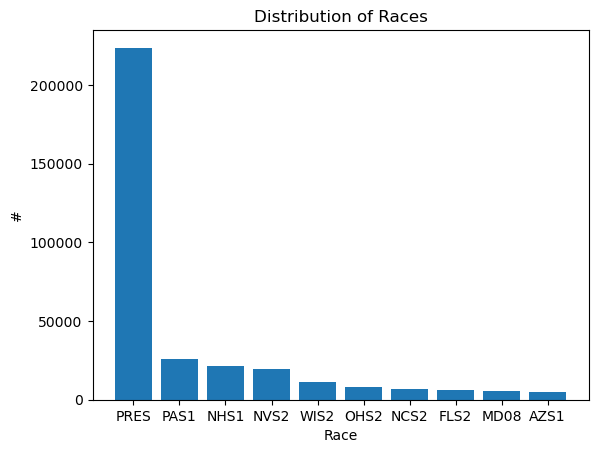

In [54]:
#bar chart for race distribution
race=ads_df['race'].value_counts(dropna=True).head(10)
df=pd.DataFrame({'Race':race.index, 'Count':race.values})
plt.bar(df.Race, df.Count)
plt.xlabel("Race")
plt.ylabel("#")
plt.title('Distribution of Races')
plt.show()

In [55]:
# Learn more about location column

ads_df['location'] = ads_df['location'].astype('string') 

ads_df['location'].dtypes

string[python]

In [56]:
ads_df['location'].value_counts(dropna = False)

Boston, MA/Manchester, NH                            50920
Philadelphia, PA                                     44326
Las Vegas, NV                                        42131
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         24580
Tampa-St. Petersburg, FL                             24207
Cleveland, Ohio                                      23156
San Francisco-Oakland-San Jose, CA                   20944
Des Moines-Ames, Iowa                                17726
Raleigh-Durham-Fayetteville,  NC                     17437
Milwaukee, WI                                        15423
Sioux City, Iowa                                     12906
Phoenix-Prescott, AZ                                 12900
Washington, DC/Hagerstown, MD                        12325
Denver, CO                                           10901
Columbia, SC                                         10870
Greenville-Spartanburg, SC/Asheville-Anderson, NC     8565
Reno, NV                                              60

In [57]:
# Capture unique values from location column

unique_locations = ads_df['location'].unique()

unique_locations

<StringArray>
[                                    'Las Vegas, NV',
                  'Raleigh-Durham-Fayetteville,  NC',
                          'Tampa-St. Petersburg, FL',
                                   'Cleveland, Ohio',
      'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
                                  'Philadelphia, PA',
                                        'Denver, CO',
                                     'Milwaukee, WI',
                'San Francisco-Oakland-San Jose, CA',
                              'Phoenix-Prescott, AZ',
                         'Boston, MA/Manchester, NH',
                     'Washington, DC/Hagerstown, MD',
               'Orlando-Daytona Beach-Melbourne, FL',
                                  'Sioux City, Iowa',
                                 'New York City, NY',
                                          'Reno, NV',
                                    'Cincinnati, OH',
                             'Des Moines-Ames, Iowa',
              

In [58]:
# Extract states from unique location values & create dictionary to translate
# *** Note that missing values are set as "nan" ***

state_postal_codes = []

for location in unique_locations:
    if isinstance(location, str):
        split_strs = location.split(',')
        state = split_strs[-1]
        state = state.strip()
        state_postal_codes.append(state)
    else:
        state_postal_codes.append("nan")
    
for i in range(len(state_postal_codes)):
    if state_postal_codes[i] == "Ohio":
        state_postal_codes[i] = "OH"
    elif state_postal_codes[i] == "Iowa":
        state_postal_codes[i] = "IA"

mapping_locations_to_state = {}

for i in range(len(state_postal_codes)):
    mapping_locations_to_state[unique_locations[i]] = state_postal_codes[i]
    
mapping_locations_to_state

{'Las Vegas, NV': 'NV',
 'Raleigh-Durham-Fayetteville,  NC': 'NC',
 'Tampa-St. Petersburg, FL': 'FL',
 'Cleveland, Ohio': 'OH',
 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa': 'IA',
 'Philadelphia, PA': 'PA',
 'Denver, CO': 'CO',
 'Milwaukee, WI': 'WI',
 'San Francisco-Oakland-San Jose, CA': 'CA',
 'Phoenix-Prescott, AZ': 'AZ',
 'Boston, MA/Manchester, NH': 'NH',
 'Washington, DC/Hagerstown, MD': 'MD',
 'Orlando-Daytona Beach-Melbourne, FL': 'FL',
 'Sioux City, Iowa': 'IA',
 'New York City, NY': 'NY',
 'Reno, NV': 'NV',
 'Cincinnati, OH': 'OH',
 'Des Moines-Ames, Iowa': 'IA',
 'Norfolk-Portsmouth-Newport News, NC': 'NC',
 'Greenville-Spartanburg, SC/Asheville-Anderson, NC': 'NC',
 'Colorado Springs-Pueblo, CO': 'CO',
 'Miami-Fort Lauderdale, FL': 'FL',
 'Charlotte, NC': 'NC',
 'Columbia, SC': 'SC',
 'Roanoke-Lynchburg, VA': 'VA',
 <NA>: 'nan'}

In [59]:
# Create new df column of state codes

states_df = ads_df['location'].replace(mapping_locations_to_state)

states_df.rename("state", inplace = True)

0         NV
1         NC
2         NV
3         FL
4         NV
          ..
375345    IA
375346    NC
375347    SC
375348    IA
375349    IA
Name: state, Length: 375350, dtype: string

In [60]:
# Add state codes column to ads_df

ads_df = pd.concat([ads_df, states_df], axis=1)

In [61]:
ads_df.head(10)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,state
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,NV
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,NC
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,NV
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,FL
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,NV
5,6,5643,WTVT,"Tampa-St. Petersburg, FL",TMZ Live,not news,2016-08-30 19:55:14+00:00,2016-08-30 19:55:44+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,FL
6,7,5643,WTOG,"Tampa-St. Petersburg, FL",Justice for All With Cristina Perez,not news,2016-08-30 13:22:30+00:00,2016-08-30 13:23:00+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,FL
7,8,5643,WLFL,"Raleigh-Durham-Fayetteville, NC",The Flash,not news,2016-09-07 00:45:00+00:00,2016-09-07 00:45:30+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,NC
8,9,5643,WOIO,"Cleveland, Ohio",Cleveland 19 News at 6PM,news,2016-08-30 22:12:59+00:00,2016-08-30 22:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,OH
9,10,5643,WRAL,"Raleigh-Durham-Fayetteville, NC",Last Call With Carson Daly,not news,2016-08-30 05:53:01+00:00,2016-08-30 05:53:31+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:32,NC


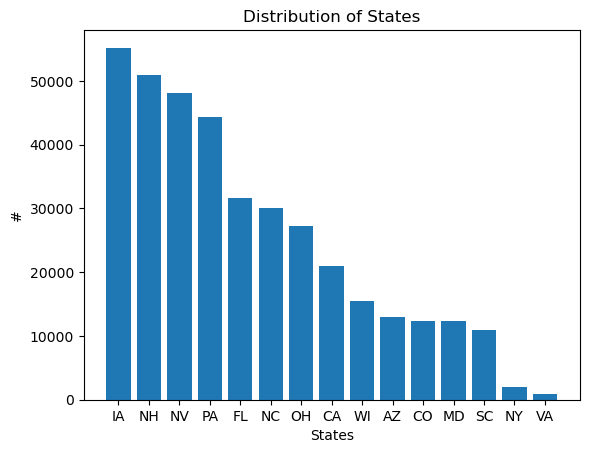

In [84]:
#bar chart for race distribution
states=ads_df['state'].value_counts(dropna=True).head(15)
df=pd.DataFrame({'States':states.index, 'Count':states.values})
plt.bar(df.States, df.Count)
plt.xlabel("States")
plt.ylabel("#")
plt.title('Distribution of States')
plt.savefig("Project2_Lee_Yueh_Friar/figures/state_dist.png")
plt.show()

In [62]:
print(ads_df.shape)
print(ads_df.head())
print(ads_df.describe())
types = ads_df.dtypes
print(ads_df)
ads_df.describe()

(375350, 20)
   id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type  \
0                      8 News Now at 5 PM         news   
1            North Carolina News at 500PM         news   
2                         Face the Nation         news   
3                       Days of Our Lives     not news   
4  The Tonight Show Starring Jimmy Fallon         news   

                 start_time                  end_time  \
0 2016-09-09 00:12:59+00:00 2016-09-09 00:13:29+00:00   
1 2016-09-06 21:58:25+00:00 2016-09-06 21:58:55+00:00   
2 2016-09-04 16:24:25+00:00 2016-09-04 16:24:55+00:00   
3 2016-08-30 

,id,wp_identifier,cycle
count,375350.000000,375350.000000,346249.0
mean,243678.989394,3997.479342,2016.0
std,142753.578957,2715.888143,0.0
min,1.000000,232.000000,2016.0
25%,117888.250000,1184.000000,2016.0
50%,228181.500000,4641.000000,2016.0
75%,380614.750000,6603.000000,2016.0
max,475694.000000,8404.000000,2016.0


In [ ]:
# Output cleaned .csv file
# Note that we can keep adding steps in this workbook to improve on the cleaned file

# ads_df.to_csv("political_tv_ad_archive_CLEANED.csv", index=False)